In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
import shap


import math

In [2]:
df = pd.read_csv("../../Data/df_standardised_end_test_6hr.csv")
df = df.drop(columns = ["Unnamed: 0", "X", "chunk", "X1.hr","X2.hr","X3.hr"])
df

,abnormal,X4.hr,X5.hr,X6.hr,X7.hr,X8.hr,X9.hr,X10.hr,X11.hr,X12.hr,...,X20.hr,X21.hr,X22.hr,X23.hr,X24.hr,X25.hr,X26.hr,X27.hr,X28.hr,train_test
0,0,-0.437480,0.710856,1.819656,0.310877,-0.650791,-0.172488,-1.328283,-0.466315,0.541083,...,0.343245,-0.537640,0.119687,0.710595,-0.945563,-0.993749,-1.476664,-2.205763,-1.409536,train
1,0,-0.024752,-0.437480,0.710856,1.819656,0.310877,-0.650791,-0.172488,-1.328283,-0.466315,...,-0.550993,0.343245,-0.537640,0.119687,0.710595,-0.945563,-0.993749,-1.476664,-2.205763,train
2,0,-1.372619,-0.024752,-0.437480,0.710856,1.819656,0.310877,-0.650791,-0.172488,-1.328283,...,0.149792,-0.550993,0.343245,-0.537640,0.119687,0.710595,-0.945563,-0.993749,-1.476664,train
3,0,-0.601068,-1.372619,-0.024752,-0.437480,0.710856,1.819656,0.310877,-0.650791,-0.172488,...,-0.030476,0.149792,-0.550993,0.343245,-0.537640,0.119687,0.710595,-0.945563,-0.993749,train
4,0,0.417116,-0.601068,-1.372619,-0.024752,-0.437480,0.710856,1.819656,0.310877,-0.650791,...,-0.650791,-0.030476,0.149792,-0.550993,0.343245,-0.537640,0.119687,0.710595,-0.945563,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31653,0,1.253461,0.491539,0.483600,-0.892592,1.115237,0.551112,1.321054,1.428236,1.249428,...,2.276413,2.359881,1.302787,1.464781,1.938614,1.548797,1.155023,1.471810,1.564629,test
31654,0,0.514161,1.253461,0.491539,0.483600,-0.892592,1.115237,0.551112,1.321054,1.428236,...,0.712996,2.276413,2.359881,1.302787,1.464781,1.938614,1.548797,1.155023,1.471810,test
31655,0,-0.053325,0.514161,1.253461,0.491539,0.483600,-0.892592,1.115237,0.551112,1.321054,...,1.718688,0.712996,2.276413,2.359881,1.302787,1.464781,1.938614,1.548797,1.155023,test
31656,0,-0.091542,-0.053325,0.514161,1.253461,0.491539,0.483600,-0.892592,1.115237,0.551112,...,2.195172,1.718688,0.712996,2.276413,2.359881,1.302787,1.464781,1.938614,1.548797,test


In [3]:
train = df.loc[df['train_test'] == "train"]
test = df.loc[df['train_test'] == "test"]

In [4]:
y_train = train.pop("abnormal")
X_train = train
X_train = X_train.drop(columns = ["train_test"])
y_test = test.pop("abnormal")
X_test = test
X_test = X_test.drop(columns = ["train_test"])

In [5]:
def get_results(truth, prediction, df, idx):
    

    acc = accuracy_score(truth, prediction)
    f1 = f1_score(truth, prediction)
    precision = precision_score(truth, prediction)
    recall = recall_score(truth, prediction)

    df.loc[idx,:] = [acc, f1, precision, recall]

    return df


In [6]:
results = pd.DataFrame(index = ['Decision Tree'], 
                       columns = ['accuracy', 'f1', 'precision', 'recall'])

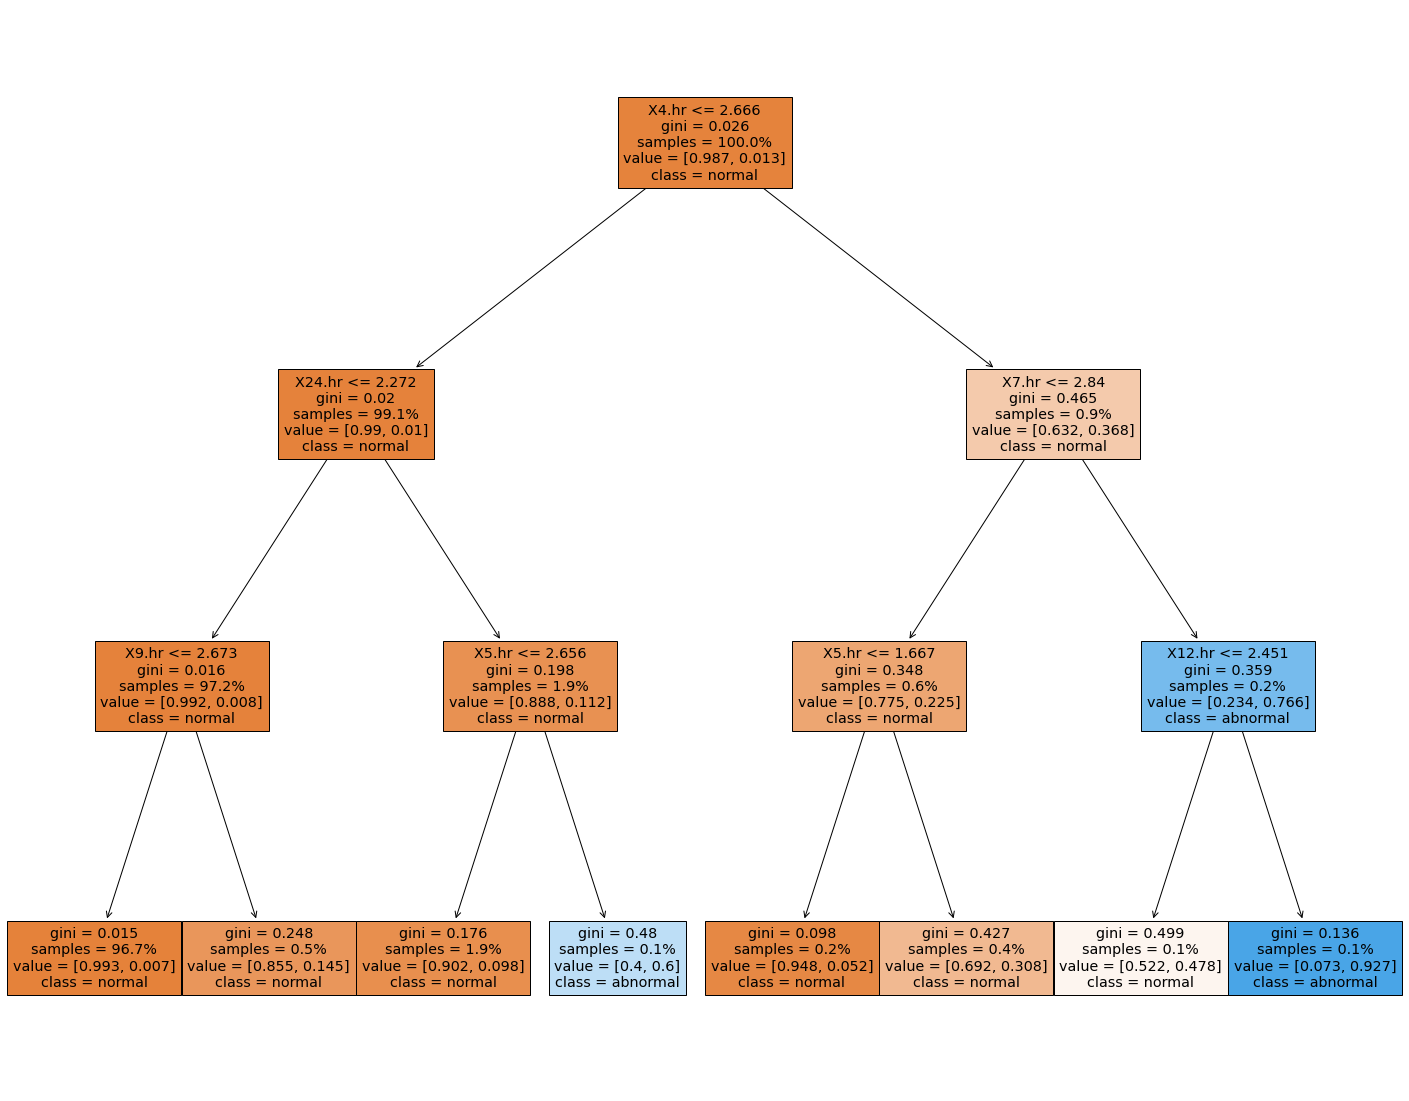

In [7]:
clf = DecisionTreeClassifier(max_depth = 3, random_state = 13)
clf.fit(X=X_train,y=y_train)

y_pred = clf.predict(X_test)

results = get_results(y_test, y_pred, results, 'Decision Tree')


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,  
                   class_names=['normal', 'abnormal'],
                   filled=True,  proportion = True)


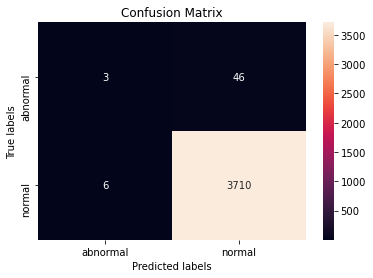

In [8]:
labels = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['abnormal', 'normal']); 
ax.yaxis.set_ticklabels(['abnormal', 'normal'])

plt.show()

In [9]:
results

,accuracy,f1,precision,recall
Decision Tree,0.986189,0.103448,0.333333,0.0612245


In [10]:
for i in range(100):
    clf = DecisionTreeClassifier(max_depth = 3, class_weight={0:1, 1:i}, random_state = 13)
    clf.fit(X=X_train,y=y_train)

    y_pred = clf.predict(X_test)

    results = get_results(y_test, y_pred, results, i)


    #fig = plt.figure(figsize=(25,20))
    #_ = tree.plot_tree(clf, 
                   #feature_names=X_train.columns,  
                   #class_names=['normal', 'abnormal'],
                   #filled=True,  proportion = True)


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [11]:
results.sort_values('f1', ascending=False)

,accuracy,f1,precision,recall
5,0.982736,0.368932,0.351852,0.387755
6,0.982736,0.368932,0.351852,0.387755
7,0.982736,0.368932,0.351852,0.387755
8,0.969987,0.354286,0.246032,0.632653
9,0.969987,0.354286,0.246032,0.632653
...,...,...,...,...
81,0.752191,0.0843965,0.0443299,0.877551
80,0.752191,0.0843965,0.0443299,0.877551
79,0.752191,0.0843965,0.0443299,0.877551
99,0.752191,0.0843965,0.0443299,0.877551


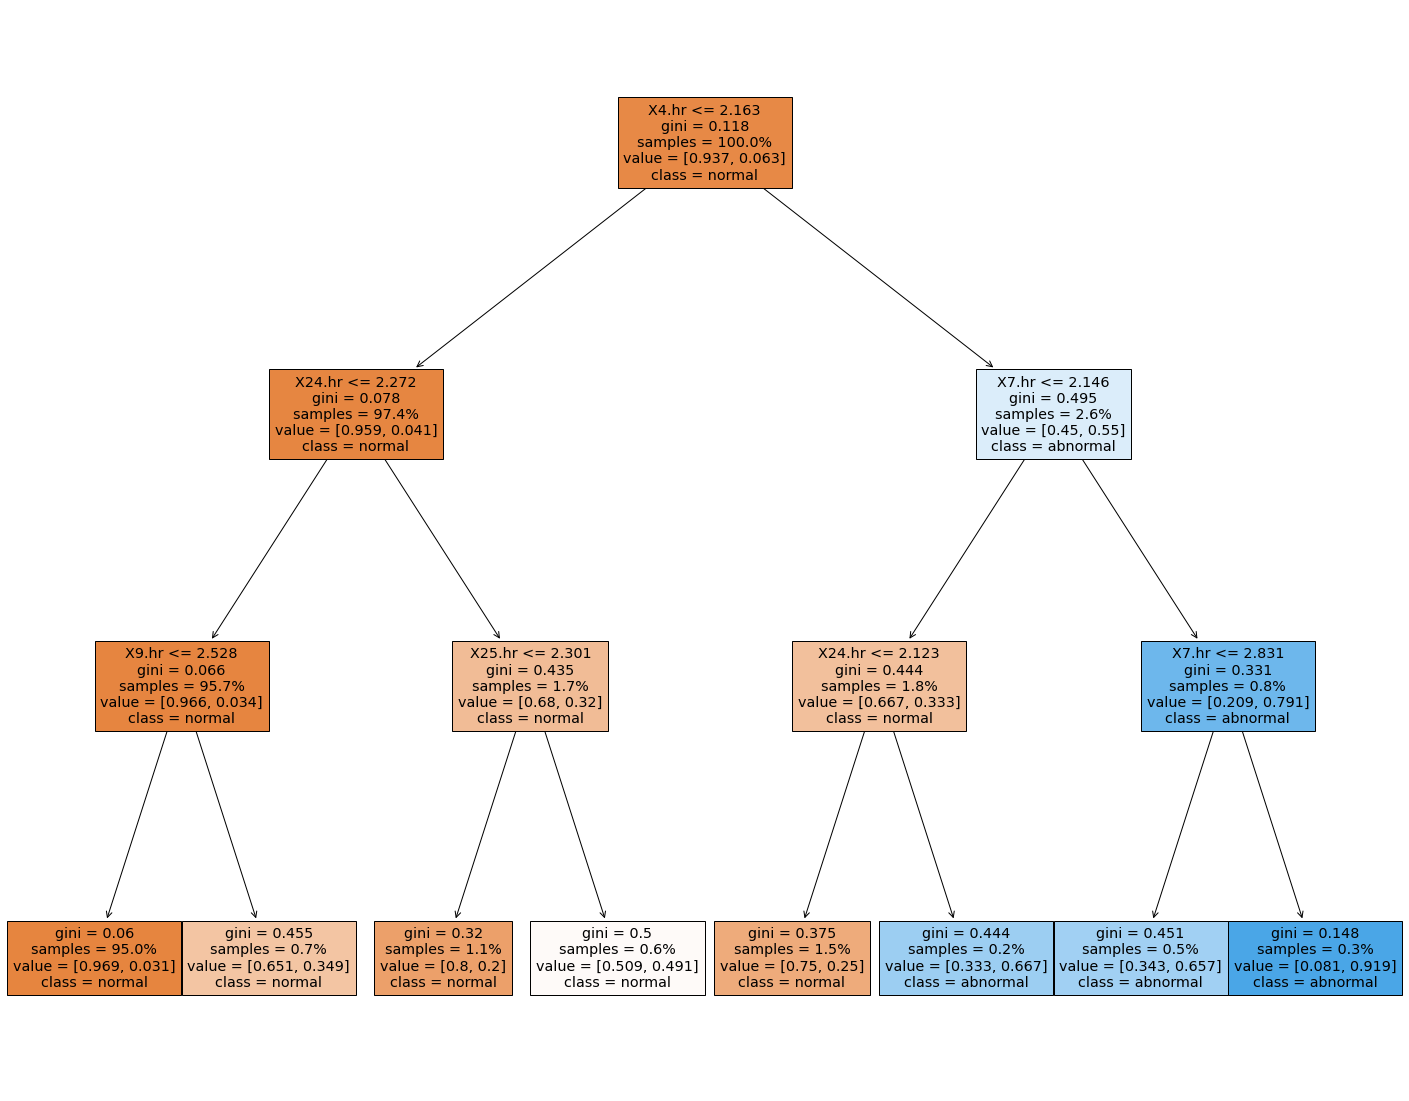

In [13]:
clf = DecisionTreeClassifier(max_depth = 3, class_weight={0:1, 1:5}, random_state = 13)
clf.fit(X=X_train,y=y_train)

y_pred = clf.predict(X_test)

results = get_results(y_test, y_pred, results, i)


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                feature_names=X_train.columns,  
                class_names=['normal', 'abnormal'],
                filled=True,  proportion = True)

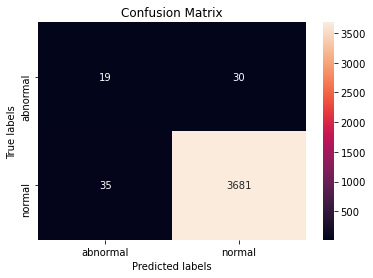

In [14]:
labels = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['abnormal', 'normal']); 
ax.yaxis.set_ticklabels(['abnormal', 'normal'])

plt.show()

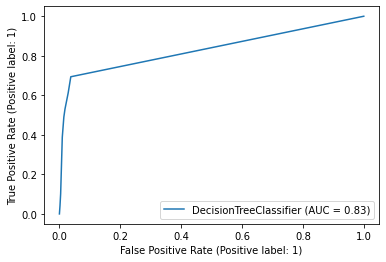

In [15]:
plot_roc_curve(clf,X_test,y_test)
plt.show()

In [16]:
y_score = clf.predict_proba(X_test)

In [17]:
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

y_test = y_test.reset_index()
y_test = y_test.drop(columns = ["index"])
y_test = y_test.squeeze()

y_pred = pd.Series(y_pred)

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_test[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_test[indices], y_score[indices, 1])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))


sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Bootstrap #1 ROC area: 0.796
Bootstrap #2 ROC area: 0.827
Bootstrap #3 ROC area: 0.796
Bootstrap #4 ROC area: 0.875
Bootstrap #5 ROC area: 0.828
Bootstrap #6 ROC area: 0.748
Bootstrap #7 ROC area: 0.793
Bootstrap #8 ROC area: 0.845
Bootstrap #9 ROC area: 0.790
Bootstrap #10 ROC area: 0.808
Bootstrap #11 ROC area: 0.813
Bootstrap #12 ROC area: 0.768
Bootstrap #13 ROC area: 0.841
Bootstrap #14 ROC area: 0.847
Bootstrap #15 ROC area: 0.777
Bootstrap #16 ROC area: 0.833
Bootstrap #17 ROC area: 0.838
Bootstrap #18 ROC area: 0.784
Bootstrap #19 ROC area: 0.841
Bootstrap #20 ROC area: 0.804
Bootstrap #21 ROC area: 0.870
Bootstrap #22 ROC area: 0.849
Bootstrap #23 ROC area: 0.779
Bootstrap #24 ROC area: 0.867
Bootstrap #25 ROC area: 0.831
Bootstrap #26 ROC area: 0.836
Bootstrap #27 ROC area: 0.805
Bootstrap #28 ROC area: 0.799
Bootstrap #29 ROC area: 0.855
Bootstrap #30 ROC area: 0.738
Bootstrap #31 ROC area: 0.934
Bootstrap #32 ROC area: 0.814
Bootstrap #33 ROC area: 0.855
Bootstrap #34 ROC a

Bootstrap #271 ROC area: 0.803
Bootstrap #272 ROC area: 0.831
Bootstrap #273 ROC area: 0.880
Bootstrap #274 ROC area: 0.809
Bootstrap #275 ROC area: 0.865
Bootstrap #276 ROC area: 0.887
Bootstrap #277 ROC area: 0.795
Bootstrap #278 ROC area: 0.870
Bootstrap #279 ROC area: 0.851
Bootstrap #280 ROC area: 0.832
Bootstrap #281 ROC area: 0.820
Bootstrap #282 ROC area: 0.858
Bootstrap #283 ROC area: 0.837
Bootstrap #284 ROC area: 0.865
Bootstrap #285 ROC area: 0.857
Bootstrap #286 ROC area: 0.813
Bootstrap #287 ROC area: 0.842
Bootstrap #288 ROC area: 0.845
Bootstrap #289 ROC area: 0.783
Bootstrap #290 ROC area: 0.790
Bootstrap #291 ROC area: 0.785
Bootstrap #292 ROC area: 0.812
Bootstrap #293 ROC area: 0.815
Bootstrap #294 ROC area: 0.831
Bootstrap #295 ROC area: 0.831
Bootstrap #296 ROC area: 0.843
Bootstrap #297 ROC area: 0.862
Bootstrap #298 ROC area: 0.893
Bootstrap #299 ROC area: 0.771
Bootstrap #300 ROC area: 0.849
Bootstrap #301 ROC area: 0.873
Bootstrap #302 ROC area: 0.836
Bootstra

Bootstrap #543 ROC area: 0.858
Bootstrap #544 ROC area: 0.852
Bootstrap #545 ROC area: 0.798
Bootstrap #546 ROC area: 0.853
Bootstrap #547 ROC area: 0.828
Bootstrap #548 ROC area: 0.758
Bootstrap #549 ROC area: 0.819
Bootstrap #550 ROC area: 0.867
Bootstrap #551 ROC area: 0.815
Bootstrap #552 ROC area: 0.885
Bootstrap #553 ROC area: 0.803
Bootstrap #554 ROC area: 0.833
Bootstrap #555 ROC area: 0.770
Bootstrap #556 ROC area: 0.844
Bootstrap #557 ROC area: 0.828
Bootstrap #558 ROC area: 0.847
Bootstrap #559 ROC area: 0.866
Bootstrap #560 ROC area: 0.886
Bootstrap #561 ROC area: 0.826
Bootstrap #562 ROC area: 0.861
Bootstrap #563 ROC area: 0.818
Bootstrap #564 ROC area: 0.885
Bootstrap #565 ROC area: 0.810
Bootstrap #566 ROC area: 0.824
Bootstrap #567 ROC area: 0.846
Bootstrap #568 ROC area: 0.857
Bootstrap #569 ROC area: 0.855
Bootstrap #570 ROC area: 0.779
Bootstrap #571 ROC area: 0.807
Bootstrap #572 ROC area: 0.773
Bootstrap #573 ROC area: 0.866
Bootstrap #574 ROC area: 0.924
Bootstra

Bootstrap #815 ROC area: 0.910
Bootstrap #816 ROC area: 0.866
Bootstrap #817 ROC area: 0.865
Bootstrap #818 ROC area: 0.870
Bootstrap #819 ROC area: 0.888
Bootstrap #820 ROC area: 0.777
Bootstrap #821 ROC area: 0.821
Bootstrap #822 ROC area: 0.849
Bootstrap #823 ROC area: 0.785
Bootstrap #824 ROC area: 0.872
Bootstrap #825 ROC area: 0.835
Bootstrap #826 ROC area: 0.826
Bootstrap #827 ROC area: 0.888
Bootstrap #828 ROC area: 0.799
Bootstrap #829 ROC area: 0.800
Bootstrap #830 ROC area: 0.846
Bootstrap #831 ROC area: 0.832
Bootstrap #832 ROC area: 0.857
Bootstrap #833 ROC area: 0.833
Bootstrap #834 ROC area: 0.792
Bootstrap #835 ROC area: 0.831
Bootstrap #836 ROC area: 0.868
Bootstrap #837 ROC area: 0.839
Bootstrap #838 ROC area: 0.828
Bootstrap #839 ROC area: 0.840
Bootstrap #840 ROC area: 0.861
Bootstrap #841 ROC area: 0.823
Bootstrap #842 ROC area: 0.856
Bootstrap #843 ROC area: 0.750
Bootstrap #844 ROC area: 0.812
Bootstrap #845 ROC area: 0.875
Bootstrap #846 ROC area: 0.849
Bootstra